<a href="https://colab.research.google.com/github/Auta01/Pytorch/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

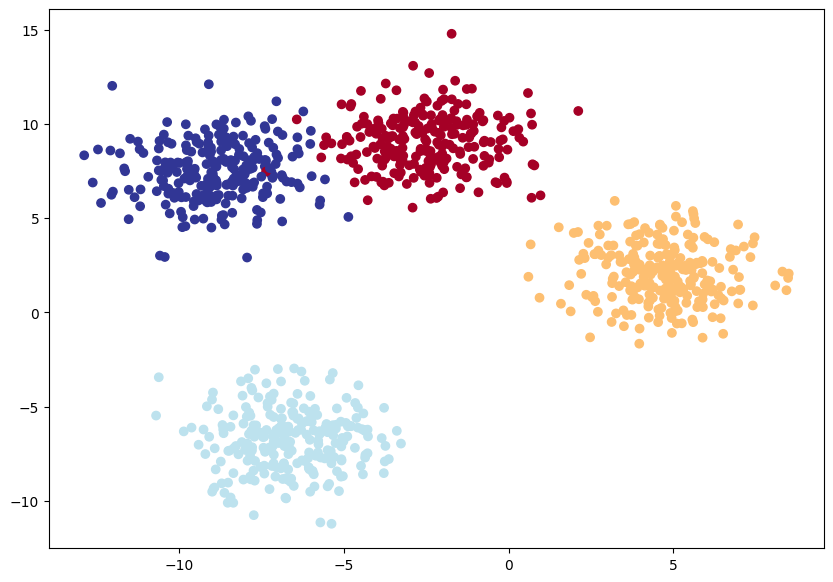

In [54]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters dor data creation

NUM_CLASSES  = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multi-class data
x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers =NUM_CLASSES,
                            cluster_std =1.5,
                            random_state=RANDOM_SEED)

#turn data into tensor
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

#Split into train and test
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

#Plot data (visualize, visualize, visualize)

plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:, 0],x_blob[:,1 ], c=y_blob, cmap=plt.cm.RdYlBu);

In [55]:
##Building a multi-class classification in pytorch

#Create device agnostic code
device ='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [56]:
from torch._higher_order_ops import out_dtype
import torch.nn as nn

#Build a multi-classs classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.Linear_layer_stack =nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self, x):
    return self.Linear_layer_stack(x)
#create an instance of blobmodel and send it to the  target device
model_0 = BlobModel(input_features=2,
output_features=4,
hidden_units=8).to(device)
model_0

BlobModel(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [57]:
x_blob.shape, y_blob[:5]

(torch.Size([1000, 2]), tensor([3, 2, 2, 1, 1]))

In [58]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [59]:
#Create a loss function
loss_fn = nn.CrossEntropyLoss()

#Create an optimizer
optimizer =torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)

#

In [60]:
model_0(x_blob_test)

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940],
        [ 0.4418, -1.3851,  0.3083,  1.2086],
        [-1.5169, -0.8383, -1.7723, -0.7571],
        [-0.2796, -1.6213, -0.5212,  0.8142],
        [ 0.0087, -1.6676, -0.2100,  1.0779],
        [-0.1146, -1.7781, -0.3619,  1.0633],
        [ 1.4046, -1.2270,  1.3925,  1.8533],
        [ 1.7991, -1.2295,  1.8271,  2.1682],
        [ 1.7553,  0.1992,  1.9850,  1.0572],
        [ 1.7293, -1.4932,  1.7121,  2.3114],
        [ 2.0059, -0.9975,  2.0886,  2.1575],
        [ 1.3878, -1.3971,  1.3495,  1.9682],
        [ 0.2662, -1.2199,  0.1385

In [61]:
#lets get some of output of our model (logits)
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_blob_test.to(device))

  y_logits[:10]

In [62]:
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [63]:
#convert our model a logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [64]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [65]:
torch.max(y_pred_probs)

tensor(0.6438)

In [66]:
#convert our models prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [67]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [79]:
##Create a training loop
torch.manual_seed(42)

# Define accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

#set the number of epoch
epoch_count = 100 # Renamed 'epoch' to 'epoch_count' to avoid conflict with loop variable 'epoch'
#put the data to the target device
x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test =  x_blob_test.to(device), y_blob_test.to(device)


#loop through data
for epoch in range(epoch_count):
  #Training
  model_0.train()
  y_logits = model_0(x_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true =y_blob_train,
                   y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    # The accuracy for testing should use test_pred, not y_pred
    test_acc = accuracy_fn(y_true =y_blob_test,
                           y_pred=test_pred)

  #print what is happening
  if epoch % 10 ==0:
    print(f'Epoch {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%')


Epoch 0 | Loss: 0.03185 | Acc: 99.12% | Test Loss: 0.02293 | Test Acc: 99.50%
Epoch 10 | Loss: 0.03093 | Acc: 99.12% | Test Loss: 0.02186 | Test Acc: 99.50%
Epoch 20 | Loss: 0.03017 | Acc: 99.12% | Test Loss: 0.02097 | Test Acc: 99.50%
Epoch 30 | Loss: 0.02955 | Acc: 99.12% | Test Loss: 0.02022 | Test Acc: 99.50%
Epoch 40 | Loss: 0.02902 | Acc: 99.12% | Test Loss: 0.01958 | Test Acc: 99.50%
Epoch 50 | Loss: 0.02857 | Acc: 99.12% | Test Loss: 0.01902 | Test Acc: 99.50%
Epoch 60 | Loss: 0.02819 | Acc: 99.12% | Test Loss: 0.01852 | Test Acc: 99.50%
Epoch 70 | Loss: 0.02785 | Acc: 99.12% | Test Loss: 0.01809 | Test Acc: 99.50%
Epoch 80 | Loss: 0.02756 | Acc: 99.12% | Test Loss: 0.01770 | Test Acc: 99.50%
Epoch 90 | Loss: 0.02730 | Acc: 99.12% | Test Loss: 0.01735 | Test Acc: 99.50%


In [72]:
#making prediction and evaluation
model_0.eval()
with torch.inference_mode():
  y_logits =model_0(x_blob_test)

  y_logits[:5]

In [73]:
y_logits[:5]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186]])

In [74]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3697e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2266e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5435e-08, 4.7619e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06]])

In [76]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [77]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([1, 3, 2, 1, 0])

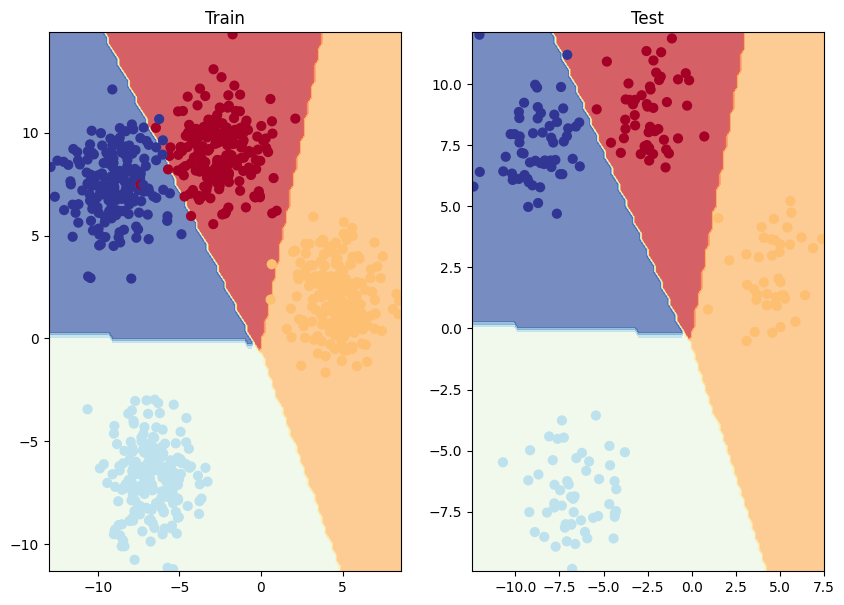

In [80]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary of model predicting on X in comparison to y.
    Source: https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
    """
    # Put everything to CPU (inputs and model) for plotting
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Make features array from meshgrid
    X_to_predict_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_predict_on)

    # Change predictions to prediction probabilities
    y_pred_probs = torch.softmax(y_logits, dim=1)
    # Change prediction probabilities to prediction labels
    y_pred = y_pred_probs.argmax(dim=1)

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, x_blob_test, y_blob_test)

In [81]:
#Downloading torch metrics
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 17.3 MB/s eta 0:00:00


In [84]:
from torchmetrics import Accuracy

#setup metric
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=NUM_CLASSES)
#calculate accucracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950)